In [3]:
%matplotlib inline

import pickle
from matplotlib import pyplot
from collections import OrderedDict
from compare import layers_correlation_meanstd


def plot_layer_correlations(filepath, reverse=False):
    with open(filepath, 'rb') as file:
        data = pickle.load(file)
    layer_metrics, args = data['layer_metrics'], data['args']
    if reverse:
        layer_metrics = OrderedDict(reversed(list(layer_metrics.items())))
    means, stds = layers_correlation_meanstd(layer_metrics)
    
    x = range(len(layer_metrics))
    pyplot.errorbar(x, means, yerr=stds)
    pyplot.xticks(x, layer_metrics.keys(), rotation='vertical')
    pyplot.title('Correlations with %s (%s images), %s' % (args.region, args.variance, args.activations_filepath))

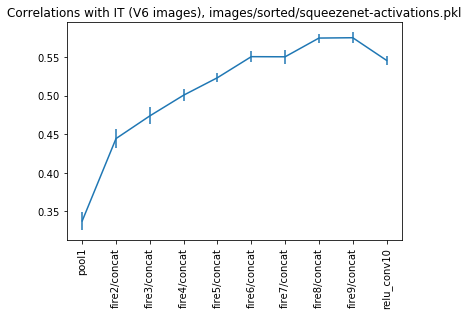

In [4]:
plot_layer_correlations('/mnt/c/Users/Martin/workspaces/dicarlo/decomposition/images/sorted/squeezenet-activations-correlations.pkl', reverse=True)

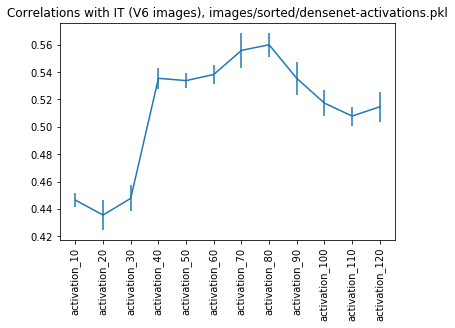

In [5]:
plot_layer_correlations('/mnt/c/Users/Martin/workspaces/dicarlo/decomposition/images/sorted/densenet-activations-correlations.pkl')